In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

### 1. 텍스트/토큰 길이

In [77]:
#1.1 audio_folder_path 폴더명 맞춰주세요!

audio_folder_path = 'Training/라벨링데이터/음성/'
data_list = []

for category_name in os.listdir(audio_folder_path):
    folder_path = os.path.join(audio_folder_path, category_name)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path,'r', encoding='utf-8') as f:
            json_data = json.load(f)
            data_list.append({'stt': json_data['voice']['stt'], 'category': category_name})

df = pd.DataFrame(data_list)
df

,stt,category
0,우리나라의 가을은 참으로 아름답다.\n무엇보다도 산에 오를 땐 더욱더 그 빼어난 아...,1. 행복
1,"쓰다듬어진 듯한 완만함과, 깍아놓은 듯한 뾰족함이 어우러진 산등성이를 따라 오르다 ...",1. 행복
2,무엇보다도 산에 오를 땐 더욱더 그 빼어난 아름다움이 느껴진다.\n쓰다듬어진 듯한 ...,2. 불행
3,"보면, 절로 감탄을 금 할 수가 없게 된다.\n붉은색, 푸른색, 노란색 등의 여러 ...",2. 불행
4,"보면, 절로 감탄을 금 할 수가 없게 된다.\n붉은색, 푸른색, 노란색 등의 여러 ...",2. 불행


In [78]:
#1.2 텍스트/토큰 길이 metric값 확인

from tqdm import tqdm
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
df['text_length'] = df['stt'].apply(len)
df['text_token_length']=df['stt'].apply(lambda text: len(tokenizer.tokenize(text)))
df[['text_length','text_token_length']].describe()

,text_length,text_token_length
count,5.000000,5.000000
mean,469.000000,570.400000
std,46.540305,57.435181
min,423.000000,514.000000
25%,423.000000,514.000000
50%,469.000000,572.000000
75%,505.000000,608.000000
max,525.000000,644.000000


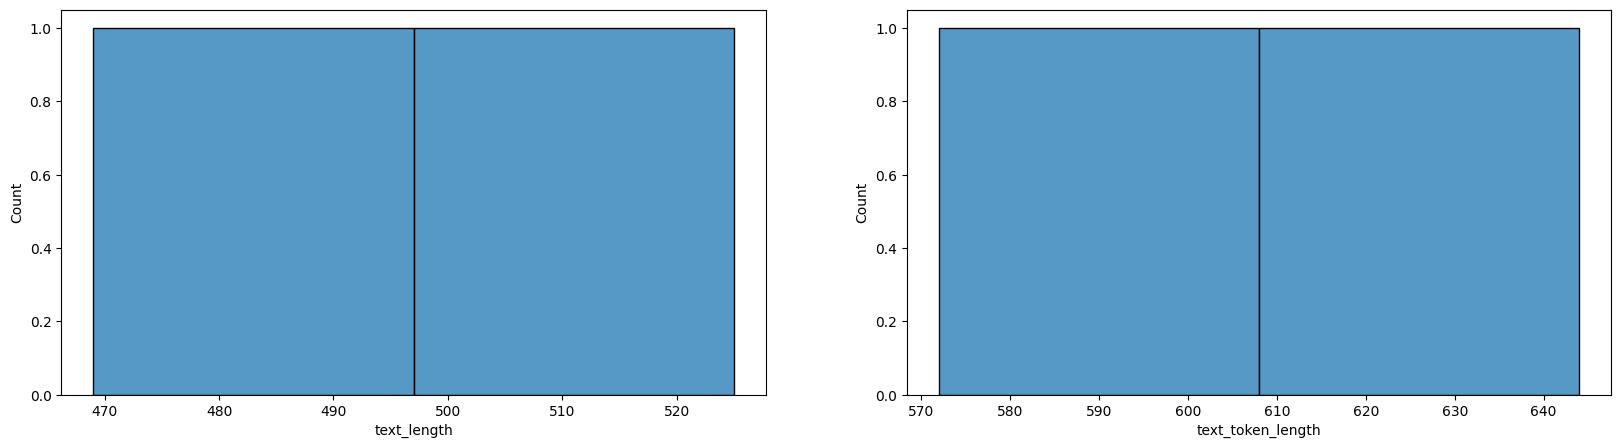

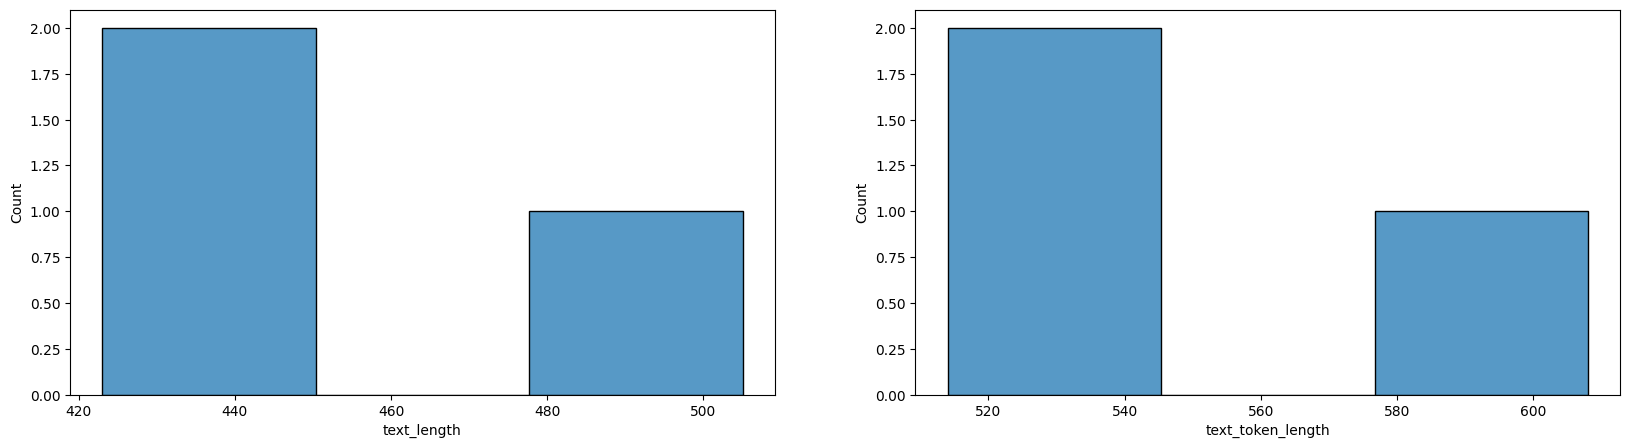

In [83]:
#1.3 category(ex. 행복/불행/..) 별로 텍스트/토큰 길이 시각화

for category in df['category'].unique():
    df_v2 = df[df['category']==category]
    fig, ax = plt.subplots(1,2,figsize=(20,5))
    sns.histplot(x='text_length', data=df_v2, ax=ax[0])
    sns.histplot(x='text_token_length', data=df_v2, ax=ax[1])
    plt.show()

### 2. 오디오 데이터 길이

In [93]:
# 2.1 audio_folder_path 폴더명 맞춰주세요!

import librosa

audio_folder_path = 'Training/원천데이터/음성/'
data_list = []

for category_name in os.listdir(audio_folder_path):
    folder_path = os.path.join(audio_folder_path, category_name)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        wav_len = librosa.get_duration(filename=file_path)
        data_list.append({'wav_len': wav_len, 'category': category_name})

df = pd.DataFrame(data_list)
df

C:\Users\saeyoun\AppData\Local\Temp\ipykernel_23560\4166808308.py:10: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  wav_len = librosa.get_duration(filename=file_path)


,wav_len,category
0,1056.8,1. 행복
1,1056.8,1. 행복
2,1056.8,2. 불행
3,1056.8,2. 불행


In [96]:
# 2.2 audio 길이 metric값 확인

df[['wav_len']].describe()

,wav_len
count,4.0
mean,1056.8
std,0.0
min,1056.8
25%,1056.8
50%,1056.8
75%,1056.8
max,1056.8


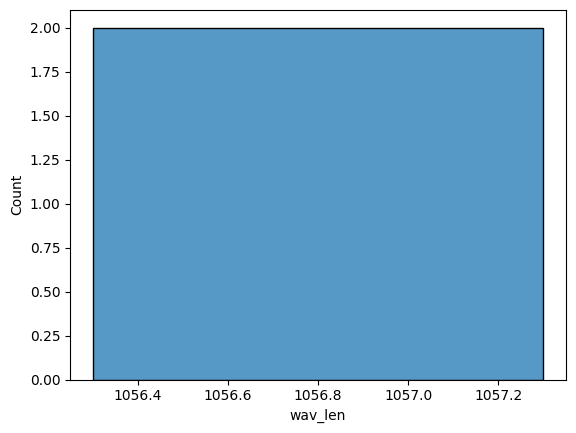

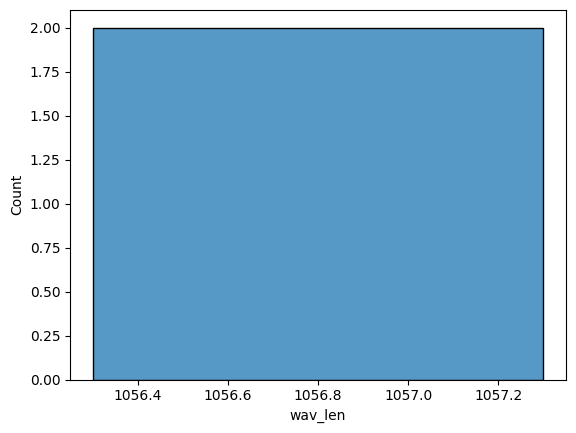

In [95]:
#2.3 category(ex. 행복/불행/..) 별로 오디오 길이 시각화

for category in df['category'].unique():
    df_v2 = df[df['category']==category]
    sns.histplot(data=df_v2, x='wav_len')
    plt.show()